In [178]:
import numpy as np
np.random.seed(42)

In [179]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [180]:
dataset = load_boston()

c:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [181]:
x = dataset.data[:, 5:6]
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [182]:
regr = LinearRegression()
regr.fit(x_train, y_train)
r2_score = regr.score(x_test, y_test)

print(f"Coef: {regr.coef_}")
print(f"Intercept: {regr.intercept_}")
print(f"R2-Score: {r2_score}")

Coef: [9.1181022]
Intercept: -34.662307438406785
R2-Score: 0.4584649934303068


In [183]:
from sklearn.preprocessing import PolynomialFeatures

degree = 3
pf = PolynomialFeatures(degree=degree)
pf.fit(x_train)

x_train_transformed = pf.transform(x_train)
x_test_transformed = pf.transform(x_test)

In [184]:
print(x_train.shape, x_train_transformed.shape)
print(x_test.shape, x_test_transformed.shape)

(354, 1) (354, 4)
(152, 1) (152, 4)


In [185]:
print(f"Old num features: {pf.n_input_features_}")
print(f"New num features: {pf.n_output_features_}")
print("Old feature names: [x0, x1]")
print(f"New feature names: {pf.get_feature_names()}")

Old num features: 1
New num features: 4
Old feature names: [x0, x1]
New feature names: ['1', 'x0', 'x0^2', 'x0^3']


c:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The attribute `n_input_features_` was deprecated in version 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)
c:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [186]:
poly_regr = LinearRegression()
poly_regr.fit(x_train_transformed, y_train)
r2_score = poly_regr.score(x_test_transformed, y_test)

print(f"Coef: {poly_regr.coef_}")
print(f"Intercept: {poly_regr.intercept_}")
print(f"R2-Score: {r2_score}")

Coef: [   0.         -115.82781708   17.62024917   -0.80641456]
Intercept: 253.69150365133908
R2-Score: 0.5837996977227156


### Visualisation

In [187]:
def plot_residuals(regr, x_train, y_train, x_test, y_test):
    y_pred_train = regr.predict(x_train)
    y_pred_test = regr.predict(x_test)

    min_val = min(np.min(y_pred_train), np.min(y_pred_test))
    max_val = max(np.max(y_pred_train), np.max(y_pred_test))

    plt.scatter(y_pred_train, y_pred_train - y_train, color="blue")
    plt.scatter(y_pred_test, y_pred_test - y_test, color="red")
    plt.hlines(y=0, xmin=min_val, xmax=max_val)
    plt.legend(["Train", "Test"])
    plt.show()


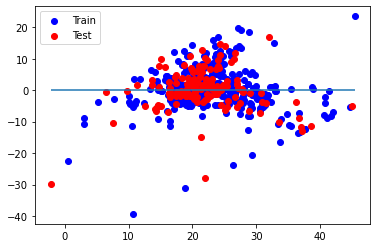

In [188]:
plot_residuals(regr, x_train, y_train, x_test, y_test)

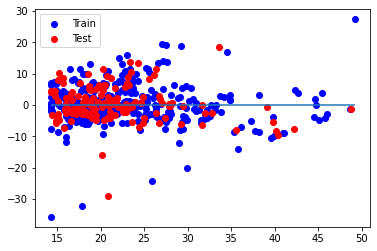

In [189]:
plot_residuals(poly_regr, x_train_transformed, y_train, x_test_transformed, y_test)

In [190]:
def f(x: np.ndarray) -> np.ndarray:
    return -x**4 * np.cos(x)

x = np.arange(start=0.0, stop=10.0, step=0.2).reshape(-1, 1)
y = f(x)

In [191]:
def plot_poly_reg(x: np.ndarray, y: np.ndarray, degree: int) -> None:
    # Preprocessing
    pf = PolynomialFeatures(degree=degree)
    pf.fit(x)
    x_transformed = pf.transform(x)
    
    poly_regr = LinearRegression()
    poly_regr.fit(x_transformed, y)
    r2_score = poly_regr.score(x_transformed, y)
    print(f"Score: {r2_score} for degree: {degree}")
    print(f"Coef: {poly_regr.coef_}")
    print(f"Intercept: {poly_regr.intercept_}")
    print(f"New feature names: {pf.get_feature_names()}")
    y_pred = poly_regr.predict(x_transformed)

    # Plotting
    _ = plt.figure(figsize=(8, 8))
    plt.plot(x, y, color="lightblue", linewidth=2, label="GT")
    plt.scatter(x, y, color="navy", s=30, marker="o", label="Dataset")
    plt.plot(x, y_pred, color="red", linewidth=2, label=f"Degree: {degree}")
    plt.show()

Score: 0.25983607779456774 for degree: 1
Coef: [[  0.       456.741386]]
Intercept: [-1527.09804037]
New feature names: ['1', 'x0']


c:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


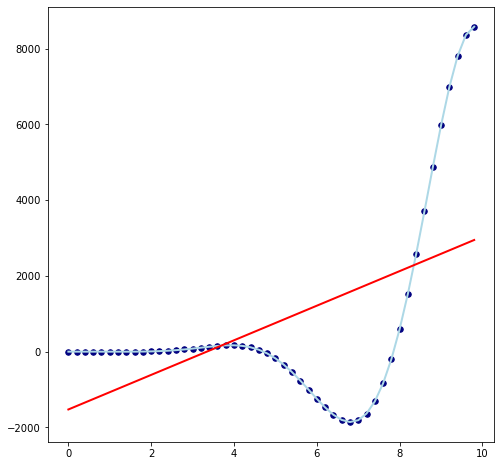

Score: 0.6611782386230813 for degree: 2
Coef: [[    0.         -1699.50036417   220.02466838]]
Intercept: [1922.8887599]
New feature names: ['1', 'x0', 'x0^2']


c:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


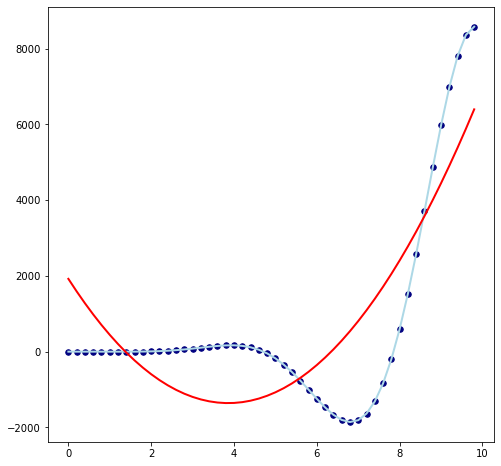

c:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Score: 0.9243841430582472 for degree: 3
Coef: [[   0.         2316.53632244 -814.89117365   70.40243823]]
Intercept: [-1190.13809295]
New feature names: ['1', 'x0', 'x0^2', 'x0^3']


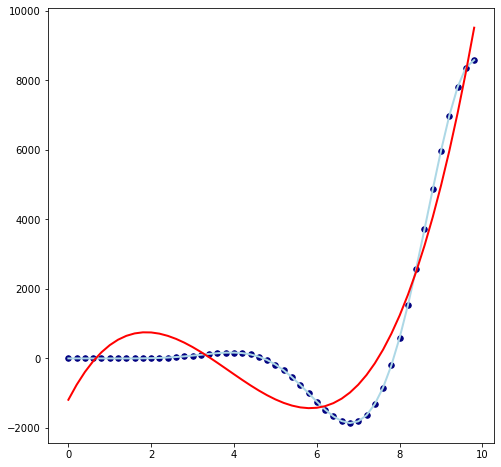

In [192]:
for degree in [1, 2, 3]:
    plot_poly_reg(x, y, degree)